In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl (38.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
file_path = "E:/vscode/Household_power/env/Scripts/household_power_consumption.txt"

In [18]:
data = pd.read_csv(file_path,sep=";",low_memory=False, na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)

In [19]:
data.head(10)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [21]:
data.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


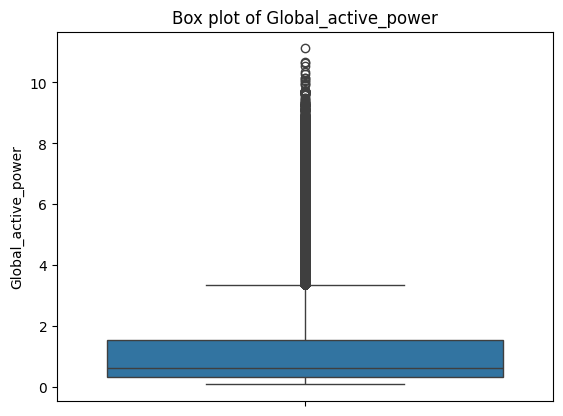

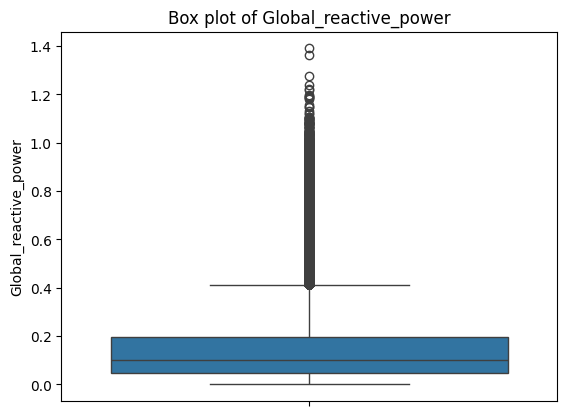

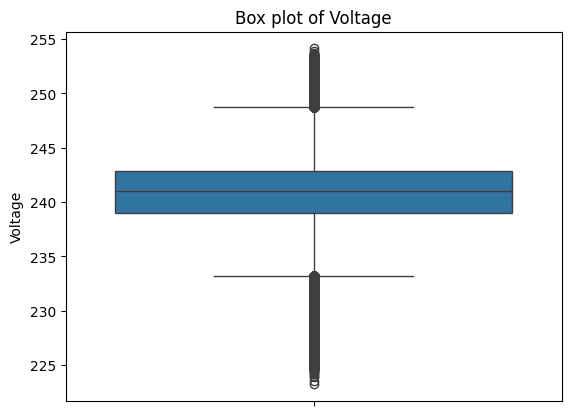

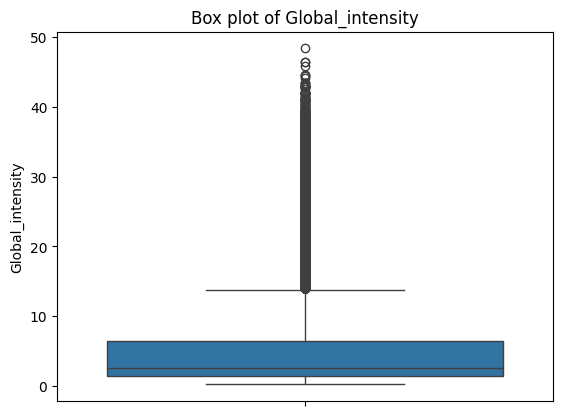

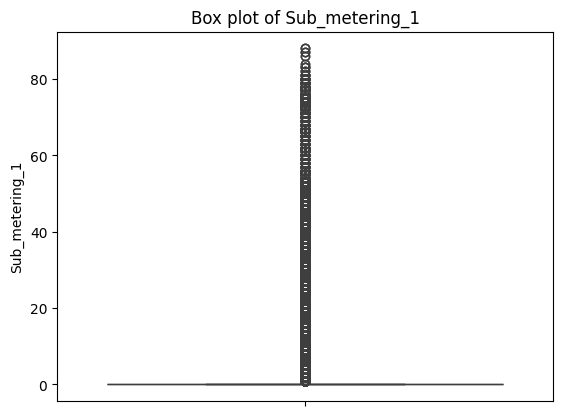

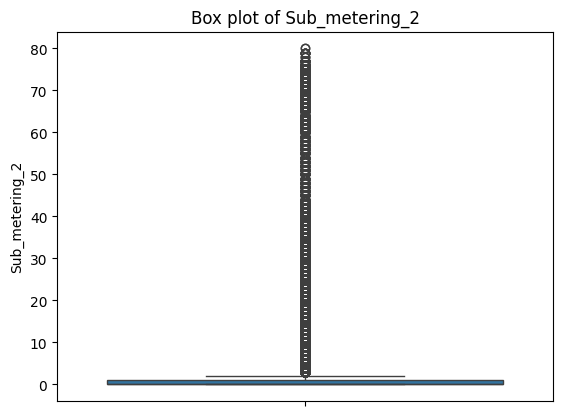

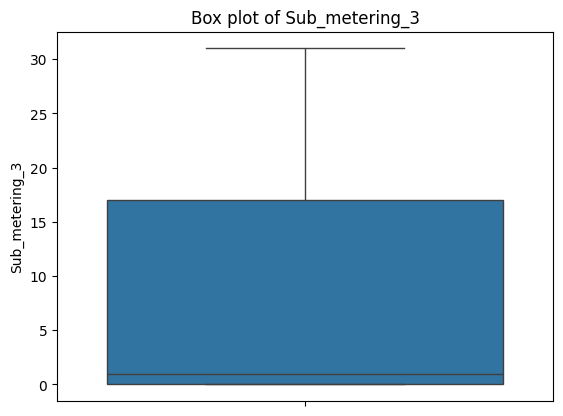

In [22]:
col_list = data.columns
for i in col_list[1:]:
  sns.boxplot(y=data[i])
  plt.title(f"Box plot of {i}")
  plt.show()

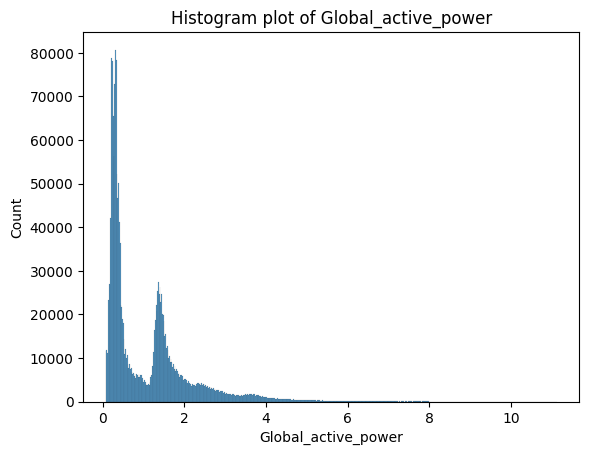

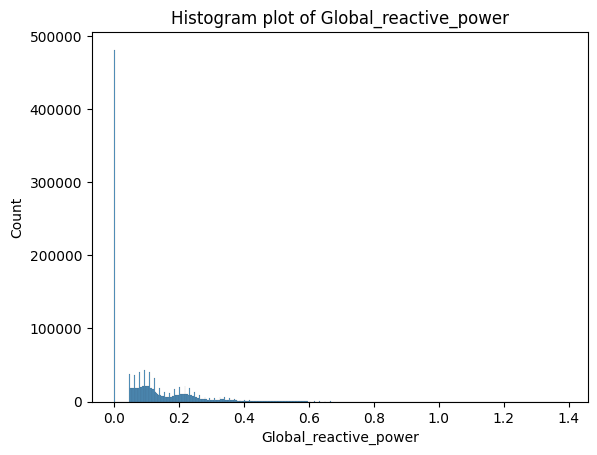

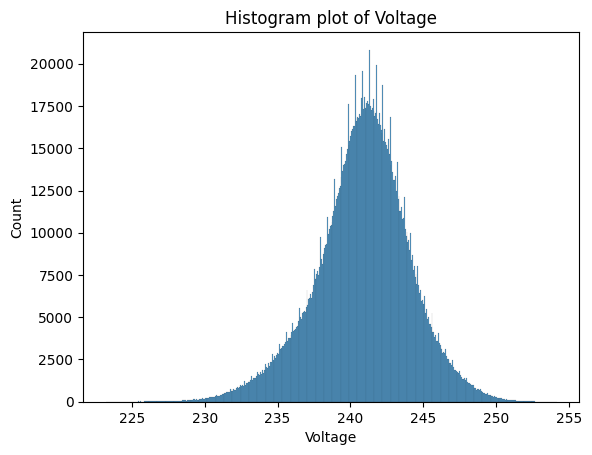

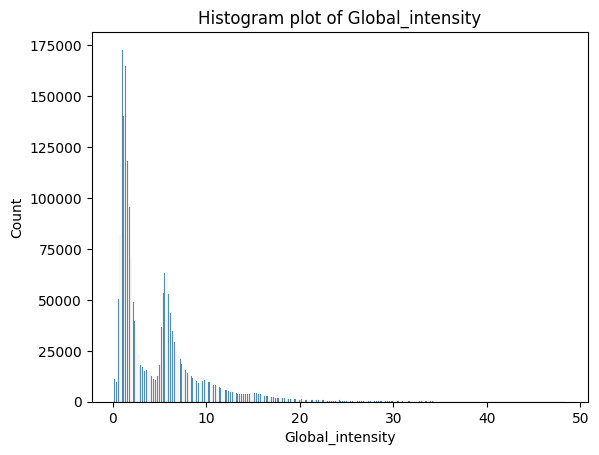

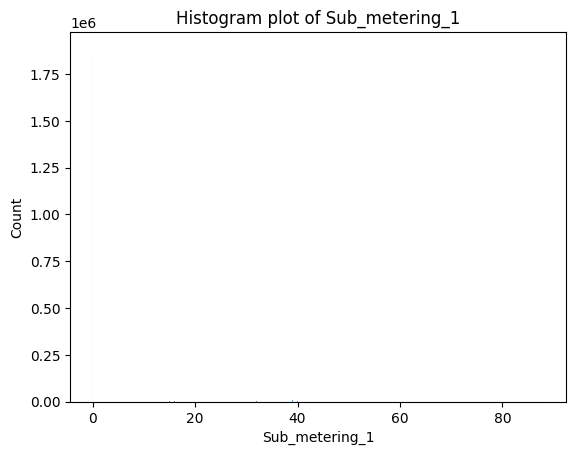

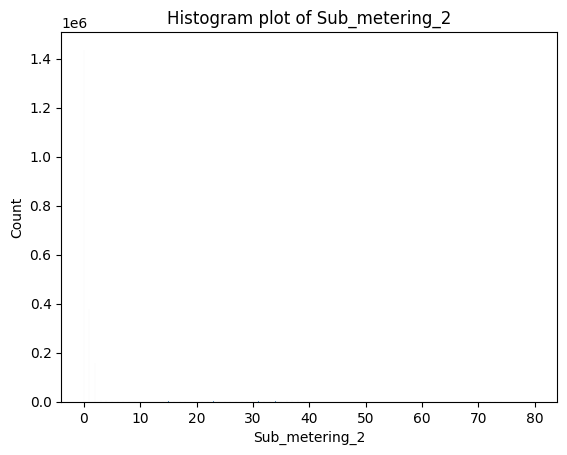

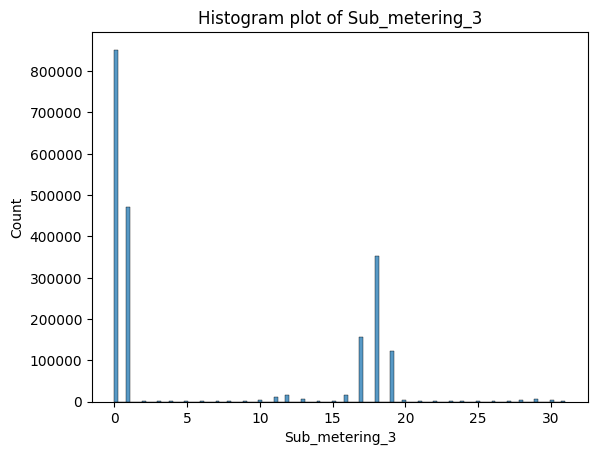

In [23]:
for i in col_list[1:]:
  sns.histplot(data=data,x=data[i])
  plt.title(f"Histogram plot of {i}")
  plt.show()

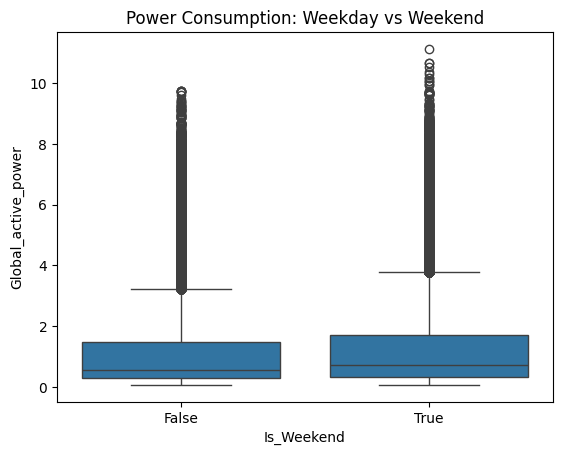

In [24]:
data["Day_of_Week"] = data["datetime"].dt.dayofweek
data["Is_Weekend"] = data["Day_of_Week"].isin([5, 6])

weekend_data = data[data["Is_Weekend"]]
weekday_data = data[~data["Is_Weekend"]]

sns.boxplot(x="Is_Weekend", y="Global_active_power", data=data)
plt.title("Power Consumption: Weekday vs Weekend")
plt.show()

data.drop(["Day_of_Week","Is_Weekend"],axis=1,inplace=True)

In [25]:
data.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

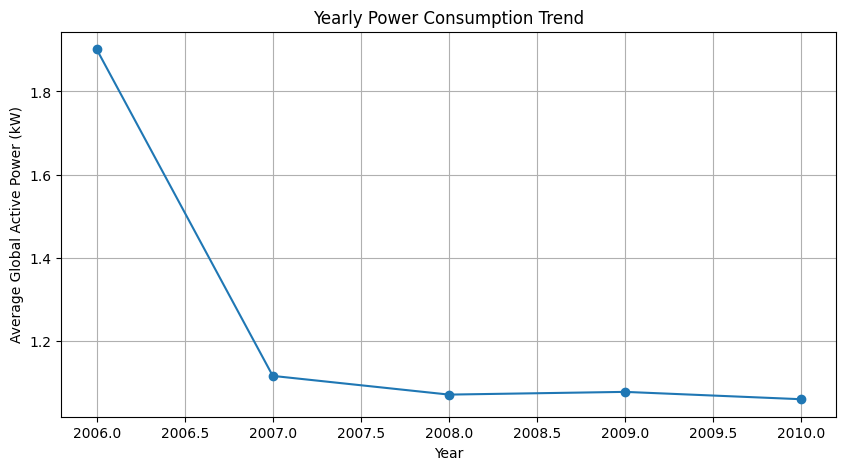

In [26]:
# Group by year and calculate the average power consumption
yearly_trend = data.groupby(data["datetime"].dt.year)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Power Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

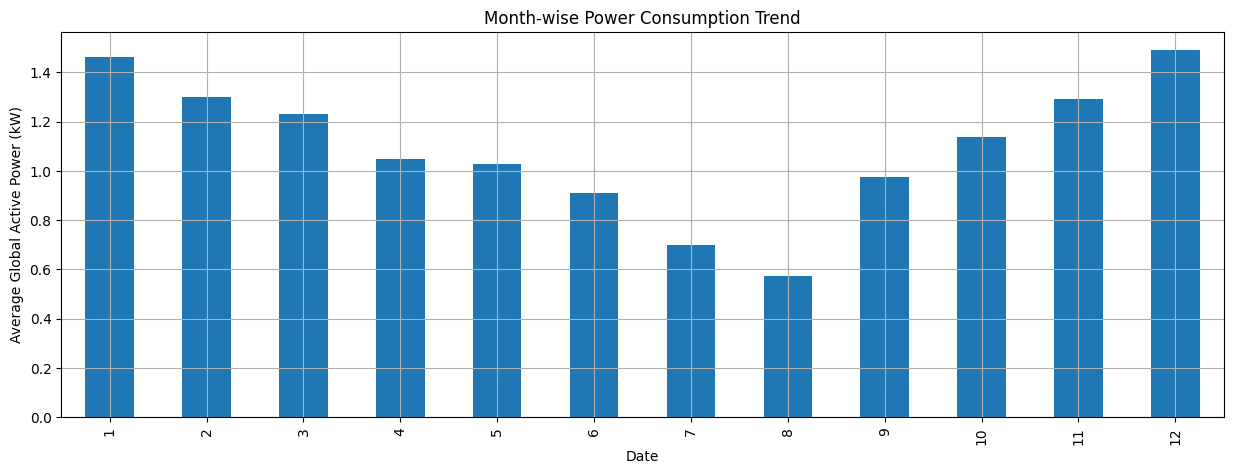

In [27]:
monthly_trend = data.groupby(data["datetime"].dt.month)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
monthly_trend.plot(kind="bar", title="Month-wise Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

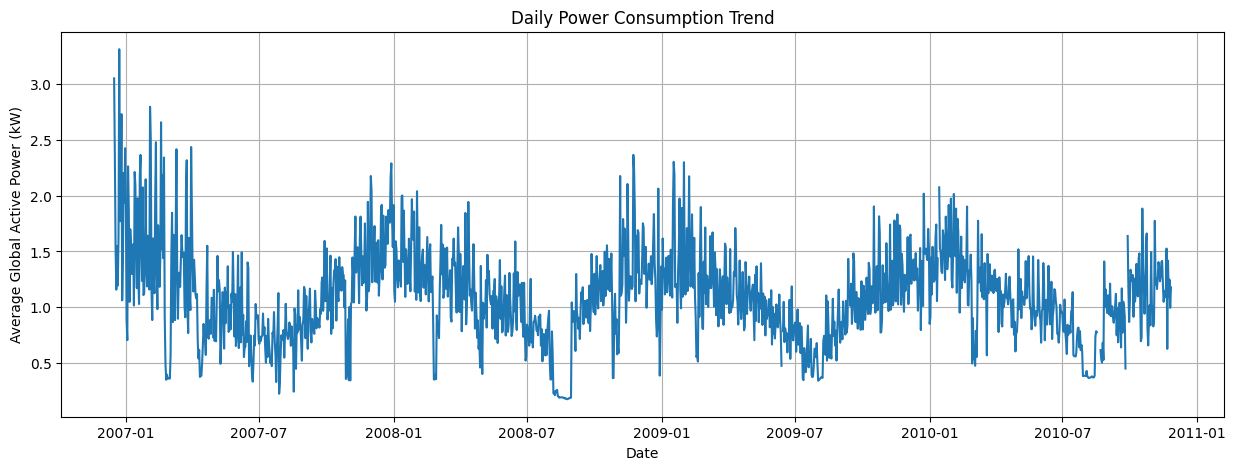

In [28]:
daily_trend = data.groupby(data["datetime"].dt.date)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

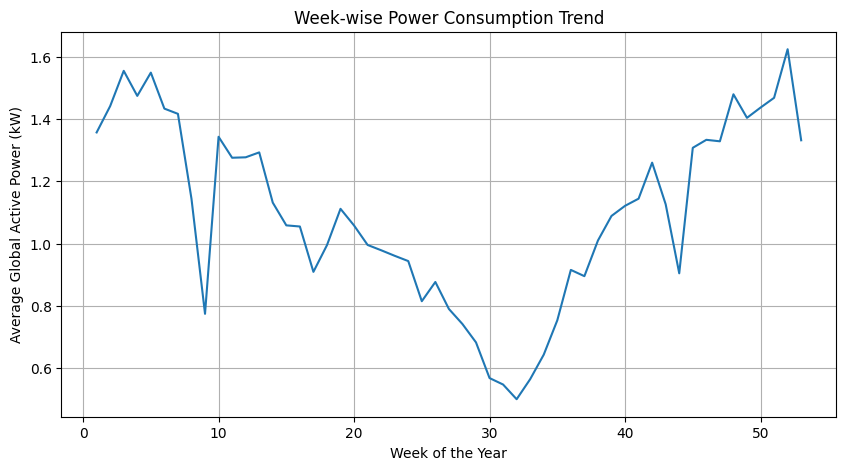

In [29]:
weekly_trend = data.groupby(data["datetime"].dt.isocalendar().week)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

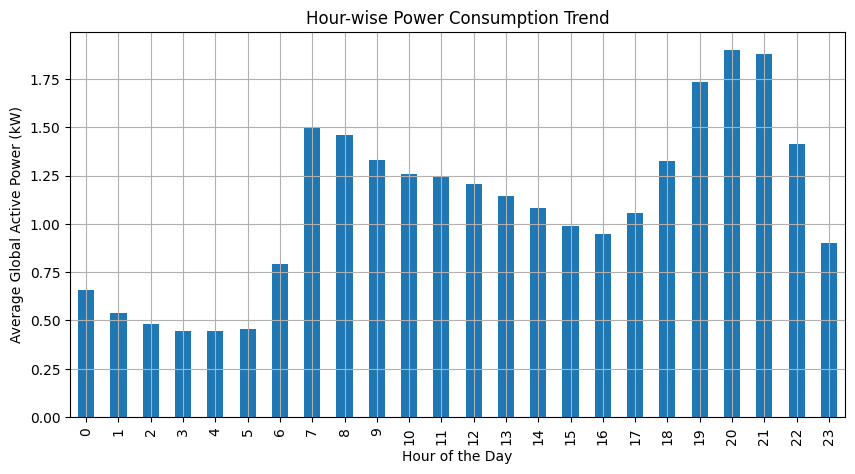

In [30]:
hourly_trend = data.groupby(data["datetime"].dt.hour)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", title="Hour-wise Power Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

In [31]:
for _ in data.columns:
    data[_].fillna(data[_].median(), inplace=True)

In [32]:
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour

In [36]:
# Daily Average
daily_average = data.groupby(data["datetime"].dt.date)["Global_active_power"].mean()
data["daily_average"] = data["datetime"].dt.date.map(daily_average)


In [35]:
# Peak Hour

hourly_avg = data.groupby([data["datetime"].dt.date,data["datetime"].dt.hour])["Global_active_power"].sum()
peak_hour_per_day = hourly_avg.groupby(level=0).max()
data["peak_hour"] = data["datetime"].dt.date.map(peak_hour_per_day)

In [37]:
# Rolling Average

rolling_average = (data.groupby(data["datetime"].dt.date)["Global_active_power"].apply(lambda x: x.rolling(window=2, min_periods=1).mean()))
data["rolling_average"] = rolling_average.reset_index(drop=True)

In [38]:
# Hourly Consumption

hourly_consumption = data.groupby([data["datetime"].dt.date, data["datetime"].dt.hour])["Global_active_power"].sum()
hourly_consumption.index.set_names(["date", "hour"], inplace=True)
data_hrs = hourly_consumption.reset_index()
data_hrs.columns = ["date", "hour", "hourly_consumption"]
data["date"] = data["datetime"].dt.date
data = pd.merge(data, data_hrs, on=["date", "hour"], how="left")
data.drop("date",axis=1,inplace=True)

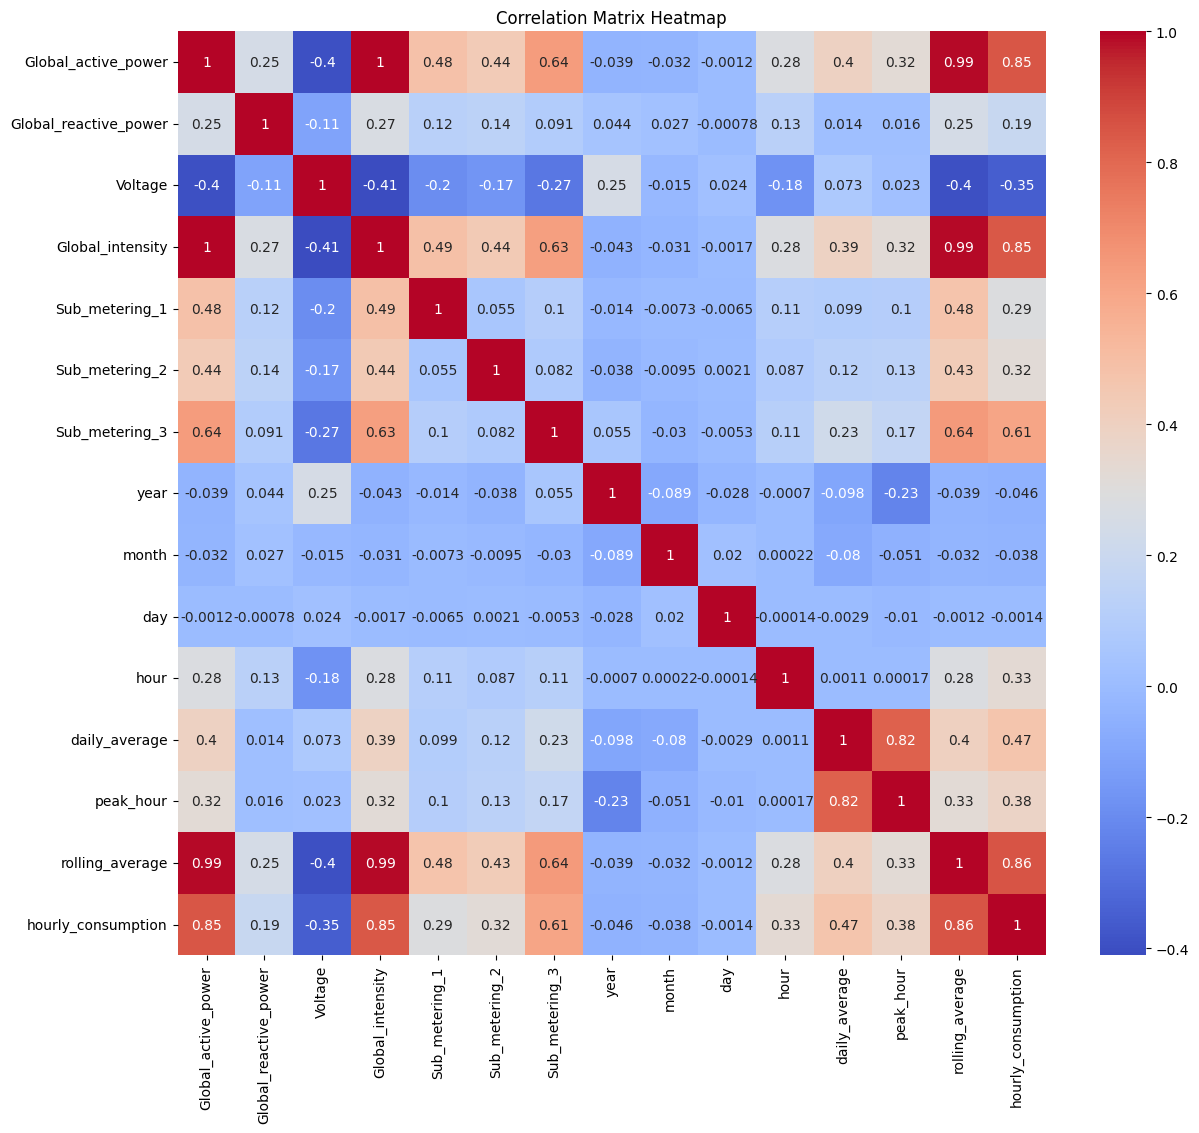

In [ ]:
corr_matrix = data[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2",
       "Sub_metering_3", "year", "month", "day", "hour", "daily_average", "peak_hour", "rolling_average", "hourly_consumption"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [40]:
X = data.drop(["datetime","Global_active_power","peak_hour","rolling_average"],axis=1)
y = data["Global_active_power"]

In [41]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Define models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

In [44]:
# Hyperparameter grids

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(64,), (128, 64)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001]
    }
}

In [ ]:
# Training and hyperparameter tuning

best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='neg_mean_squared_error')
        if model_name == 'Neural Network':
            grid_search.fit(X_train_scaled, y_train)
        else:
            grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model
    print(f"{model_name} training completed.")


Training Linear Regression
Linear Regression training completed.
Training Random Forest


In [ ]:
# Model evaluation

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [ ]:
print("\nModel Evaluation:")
results = []
for model_name, model in best_models.items():
    scaled = model_name in ['Neural Network', 'Gradient Boosting']
    mse, mae, r2 = evaluate_model(model, X_test, y_test, scaled)
    results.append((model_name, mse, mae, r2))
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Select the best model
best_model = sorted(results, key=lambda x: x[1])[0]  # Based on MSE
print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]:.4f}")